In [ ]:
# Simulate Game 
# starting value S
# Current Value C
# Target Value T
# Bet (percentage of current value or Exact Amount) B
# Win/Lose B with probability p, p-1 (P)
# End Game if C <= 0 or C >= T
# For each game record Current Value at each round
# X simulations of the game
# maybe take average of every game C per round and plot?

In [164]:
import numpy as np
import pandas as pd
import random
from pylab import plt
%matplotlib inline

In [197]:
np.set_printoptions(suppress=True)

In [294]:

class GamblersRuin():
    def __init__(self, S, T, B, P):
        
        self.start = S
        self.target = T
        self.bet = B # percentage 
        self.p = P
        self.wins = 0
        self.losses = 0
        
    
    def play(self):
        
        game = [self.current]
        
        while self.current > 1 and self.current < self.target:
            
            bet = round(self.current * self.bet,2)
            outcome = random.random()
            if outcome < self.p:
                self.current += bet
            else:
                self.current -= bet
            
            self.current = round(self.current,2)
            game.append(self.current)
            
        if self.current >= self.target:
            self.wins += 1
            
        return game
    
    def simulate(self,n):
        
        games = []
        for i in range(n):
            self.current = self.start
            games.append(self.play())
        print("num wins: ", self.wins, "num losses: ", n-self.wins)
        return games

class GR2():
    def __init__(self, num_trials, games_per_trial,win_prob,start_amount,bet_percent):
        
        self.num_trials = num_trials
        self.games_per_trial = games_per_trial
        self.win_prob = win_prob
        self.start_amount = start_amount
        self.bet_percent = bet_percent
        
    def kelly(self,p):
        return p-(1-p) 
    
    def simulate(self):
        
        outcomes = np.zeros((self.games_per_trial,self.num_trials))
        outcomes[0] = self.start_amount
        
        for i in range(self.num_trials):
            for j in range(1,self.games_per_trial):
                res = np.random.binomial(1,self.win_prob)
                
                if res > 0:
                    outcomes[j,i] = (1+self.bet_percent) * outcomes[j-1,i]
                else:
                    outcomes[j,i] = (1-self.bet_percent) * outcomes[j-1,i]
        return outcomes
    
    def num_wins(self,result):
        wins = sum([1 for i in result if i > self.start_amount])
        return wins
    def num_wins_above_target(self,result,target):
       
        wins_above_target = sum([1 for i in result if i > target])
        return wins_above_target
       
    def mean_result(self,result):
        return np.mean(result).round(2)
    def median_result(self,result):
        return np.median(result).round(2)
    def min_max_result(self,result):
        return min(result),max(result)

In [ ]:
return(wins, "wins out of", self.num_trials, " trials = ", round((wins/self.num_trials)*100,2),"%")
 print(wins_above_target, "wins above target out of", self.num_trials, " trials = ", round((wins_above_target/self.num_trials)*100,2),"%")

In [281]:
gr2 = GR2(num_trials=50,games_per_trial=100,win_prob=0.7,start_amount=10,bet_percent=0.8)

In [275]:
out = gr2.simulate()
print(out)

[[  10.           10.           10.         ...   10.
    10.           10.        ]
 [   2.           18.           18.         ...   18.
    18.           18.        ]
 [   3.6          32.4           3.6        ...   32.4
    32.4           3.6       ]
 ...
 [  80.42114628  723.79031656    8.93568292 ...    0.00000002
    80.42114628    0.00015133]
 [ 144.75806331 1302.82256981    1.78713658 ...    0.
   144.75806331    0.00027239]
 [ 260.56451396  260.56451396    3.21684585 ...    0.
   260.56451396    0.00005448]]


In [278]:
gr2.win_loss_ratio(out[-1])

(15, 'wins out of', 50, ' trials = ', 30.0, '%')

In [229]:
out[-1]

array([9.28839943e+01, 8.73613929e-05, 5.26342635e+02, 1.63912931e+01,
       2.89258114e+00, 1.58965379e-02, 2.89258114e+00, 9.00803815e-02,
       5.10455495e-01, 5.10455495e-01, 3.07543734e+06, 2.89258114e+00,
       5.10455495e-01, 2.89258114e+00, 2.72059701e-06, 1.63912931e+01,
       3.07543734e+06, 8.73613929e-05, 9.57748653e+04, 5.26342635e+02,
       5.10455495e-01, 5.42724237e+05, 5.10455495e-01, 5.10455495e-01,
       9.87557102e+07, 5.26342635e+02, 5.26342635e+02, 4.95047893e-04,
       5.10455495e-01, 1.58965379e-02, 2.89258114e+00, 5.26342635e+02,
       2.80527140e-03, 5.10455495e-01, 9.00803815e-02, 3.07543734e+06,
       1.63912931e+01, 1.58965379e-02, 9.28839943e+01, 5.59615691e+08,
       1.63912931e+01, 1.58965379e-02, 1.54167164e-05, 2.98260826e+03,
       2.89258114e+00, 2.89258114e+00, 1.74274783e+07, 9.00803815e-02,
       5.10455495e-01, 1.63912931e+01])

In [377]:
#df = pd.DataFrame(columns=[["Bet %","Wins","Win %","Mean","Median"]])
row_list = []
for gpt in range(1,10):
    for i in range(1,11):
        bet_percent = i/10
        gr2 = GR2(num_trials=1000,games_per_trial=50*gpt,win_prob=0.7,start_amount=10,bet_percent=bet_percent)
        out = gr2.simulate()
        wins = gr2.num_wins(out[-1])
        win_percent =  round((wins/gr2.num_trials)*100,2)
        mean = gr2.mean_result(out[-1]).round(2)
        median = gr2.median_result(out[-1]).round(2)
        print("Bet Percentage: ",bet_percent, " results in ", wins, "wins out of", gr2.num_trials, " trials = ",win_percent,"%")
        print("Mean: ", mean, "Median: ", median)

        row_dict = {('gpt',gr2.games_per_trial):{'Bet %':bet_percent,'Wins':wins,'Win %': win_percent,'Mean':mean,'Median':median}}
        row_list.append(row_dict)
df = pd.DataFrame(row_list)

Bet Percentage:  0.1  results in  996 wins out of 1000  trials =  99.6 %
Mean:  68.67 Median:  52.6
Bet Percentage:  0.2  results in  992 wins out of 1000  trials =  99.2 %
Mean:  418.85 Median:  173.19
Bet Percentage:  0.3  results in  958 wins out of 1000  trials =  95.8 %
Mean:  2709.67 Median:  355.26
Bet Percentage:  0.4  results in  920 wins out of 1000  trials =  92.0 %
Mean:  13243.34 Median:  1020.0
Bet Percentage:  0.5  results in  874 wins out of 1000  trials =  87.4 %
Mean:  42536.31 Median:  888.74
Bet Percentage:  0.6  results in  727 wins out of 1000  trials =  72.7 %
Mean:  246806.44 Median:  93.54
Bet Percentage:  0.7  results in  479 wins out of 1000  trials =  47.9 %
Mean:  543875.89 Median:  9.82
Bet Percentage:  0.8  results in  353 wins out of 1000  trials =  35.3 %
Mean:  107109.33 Median:  0.16
Bet Percentage:  0.9  results in  78 wins out of 1000  trials =  7.8 %
Mean:  3959.1 Median:  0.0
Bet Percentage:  1.0  results in  0 wins out of 1000  trials =  0.0 %
Me

Bet Percentage:  0.5  results in  999 wins out of 1000  trials =  99.9 %
Mean:  9.327215279627955e+24 Median:  101358878562917.95
Bet Percentage:  0.6  results in  961 wins out of 1000  trials =  96.1 %
Mean:  3.6148641665986696e+22 Median:  62912089794.64
Bet Percentage:  0.7  results in  628 wins out of 1000  trials =  62.8 %
Mean:  5.205615992633041e+20 Median:  354.65
Bet Percentage:  0.8  results in  86 wins out of 1000  trials =  8.6 %
Mean:  6.842943930189173e+16 Median:  0.0
Bet Percentage:  0.9  results in  0 wins out of 1000  trials =  0.0 %
Mean:  0.01 Median:  0.0
Bet Percentage:  1.0  results in  0 wins out of 1000  trials =  0.0 %
Mean:  0.0 Median:  0.0
Bet Percentage:  0.1  results in  1000 wins out of 1000  trials =  100.0 %
Mean:  356488594.62 Median:  66075721.5
Bet Percentage:  0.2  results in  1000 wins out of 1000  trials =  100.0 %
Mean:  1.4331176575822348e+16 Median:  9039632230024.3
Bet Percentage:  0.3  results in  1000 wins out of 1000  trials =  100.0 %
Mea

In [402]:
#### Median gains for given bet percent

gr2 = GR2(num_trials=1000,games_per_trial=5000,win_prob=0.7,start_amount=10,bet_percent=0.75)
out = gr2.simulate()
medians = [np.median(out[i]) for i in range(len(out))]


In [412]:
#### Test Median gains for different given bet percent
result_dict = {}

for i in range(0,101):
    bet_perc = i/100
    gr2 = GR2(num_trials=10000,games_per_trial=1000,win_prob=0.7,start_amount=10,bet_percent=bet_perc)
    out = gr2.simulate()
    medians = [np.median(out[i]) for i in range(len(out))]
    result_dict[bet_perc] = medians[-1]

In [413]:
result_dict

{0.0: 10.0,
 0.01: 514.278837261579,
 0.02: 23952.05439765085,
 0.03: 1010974.8430120242,
 0.04: 38696713.46702559,
 0.05: 1344007327.6618683,
 0.06: 42379506972.6089,
 0.07: 1396516261941.96,
 0.08: 31590266452979.082,
 0.09: 747377048548470.6,
 0.1: 1.6078286288266438e+16,
 0.11: 3.146039458384551e+17,
 0.12: 5.600147830694878e+18,
 0.13: 1.1780588097480599e+20,
 0.14: 1.7718740893052727e+21,
 0.15: 1.7925369698634498e+22,
 0.16: 2.187360111925216e+23,
 0.17: 2.428538950637384e+24,
 0.18: 3.529774627536852e+25,
 0.19: 2.2533656877131e+26,
 0.2: 2.823438574983975e+27,
 0.21: 1.429227086624914e+28,
 0.22: 9.860579724568573e+28,
 0.23: 6.17860523265291e+29,
 0.24: 5.733815383923467e+30,
 0.25: 1.8133352755544174e+31,
 0.26: 1.444327837760887e+32,
 0.27: 3.59466964539601e+32,
 0.28: 1.378852190023297e+33,
 0.29: 4.7831292316739534e+33,
 0.3: 1.4990470591942897e+34,
 0.31: 4.239970984219386e+34,
 0.32: 1.0810647950791062e+35,
 0.33: 2.481634660636933e+35,
 0.34: 5.121942746279021e+35,
 0.

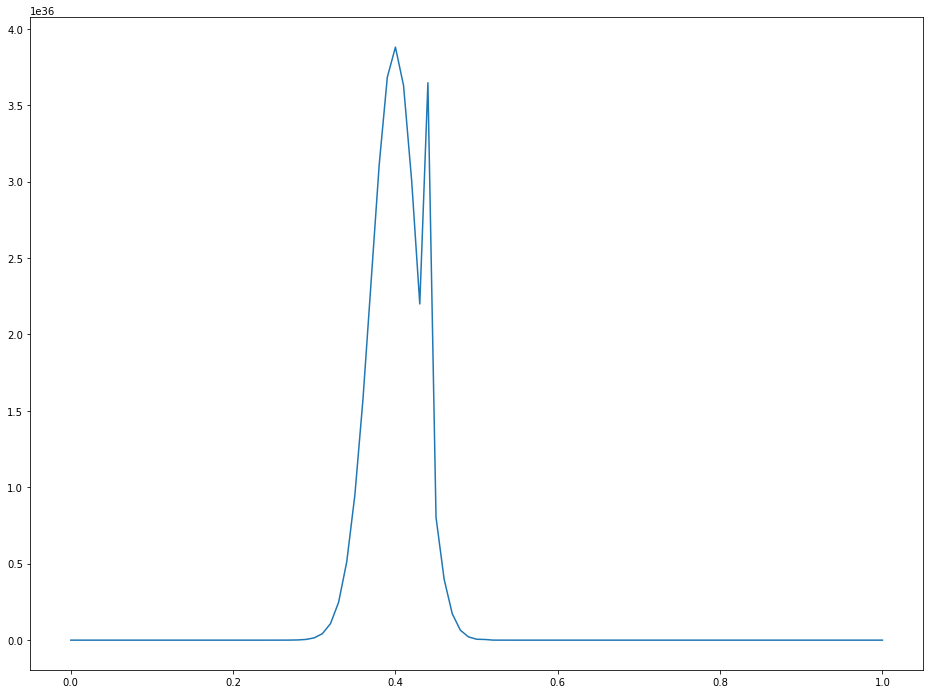

In [414]:
lists = sorted(result_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(16,12))
plt.plot(x, y)
#plt.show()

In [420]:
log_lists = [(i,np.log2(j)) for i,j in lists]

/Users/daniellevit/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log2



In [421]:
log_lists

[(0.0, 3.321928094887362),
 (0.01, 9.006406977324806),
 (0.02, 14.547861782575284),
 (0.03, 19.94731566714536),
 (0.04, 25.20570770690769),
 (0.05, 30.32389385784149),
 (0.06, 35.30264775290486),
 (0.07, 40.344969512041665),
 (0.08, 44.84454533930585),
 (0.09, 49.408829588617884),
 (0.1, 53.83596316257696),
 (0.11, 58.12631437858088),
 (0.12, 62.28017061939194),
 (0.13, 66.67497345933845),
 (0.14, 70.58576608118395),
 (0.15, 73.92442096136611),
 (0.16, 77.5335369377383),
 (0.17, 81.0063629028145),
 (0.18, 84.86777844403328),
 (0.19, 87.54221192757731),
 (0.2, 91.18951180722169),
 (0.21, 93.52922181800983),
 (0.22, 96.31565912506939),
 (0.23, 98.96319595053647),
 (0.24, 102.17733830038209),
 (0.25, 103.8384166375005),
 (0.26, 106.8320972829349),
 (0.27, 108.1475582276865),
 (0.28, 110.08709494263111),
 (0.29, 111.88158190219664),
 (0.3, 113.52960090031704),
 (0.31, 115.02960961806586),
 (0.32, 116.37993631659818),
 (0.33, 117.57877406260066),
 (0.34, 118.62417444745637),
 (0.35, 119.514

In [403]:
averages[-1]

2.8513289357099283e-53

In [349]:
row_list

[{'games_per_trial': {'Bet %': 0.1,
   'Mean': 70.23,
   'Median': 64.29,
   'Win %': 99.8,
   'Wins': 998}},
 {'games_per_trial': {'Bet %': 0.2,
   'Mean': 433.76,
   'Median': 259.78,
   'Win %': 98.7,
   'Wins': 987}},
 {'games_per_trial': {'Bet %': 0.3,
   'Mean': 2852.7,
   'Median': 355.26,
   'Win %': 96.7,
   'Wins': 967}},
 {'games_per_trial': {'Bet %': 0.4,
   'Mean': 19869.02,
   'Median': 437.14,
   'Win %': 93.3,
   'Wins': 933}},
 {'games_per_trial': {'Bet %': 0.5,
   'Mean': 53617.07,
   'Median': 296.25,
   'Win %': 87.4,
   'Wins': 874}},
 {'games_per_trial': {'Bet %': 0.6,
   'Mean': 290402.59,
   'Median': 233.84,
   'Win %': 72.1,
   'Wins': 721}},
 {'games_per_trial': {'Bet %': 0.7,
   'Mean': 112093.73,
   'Median': 9.82,
   'Win %': 48.3,
   'Wins': 483}},
 {'games_per_trial': {'Bet %': 0.8,
   'Mean': 278005.81,
   'Median': 0.16,
   'Win %': 36.3,
   'Wins': 363}},
 {'games_per_trial': {'Bet %': 0.9,
   'Mean': 33594.9,
   'Median': 0.0,
   'Win %': 9.2,
   'Wi

In [363]:
td= ({'games_per_trial': {'Bet %': 0.1,'Mean': 70.23,
'Median': 64.29,
'Win %': 99.8,
'Wins': 998}},{'games_per_trial': {'Bet %': 0.2,
'Mean': 433.76,
'Median': 259.78,
'Win %': 98.7,
'Wins': 987}})

In [378]:
df1 = pd.concat([pd.DataFrame(l) for l in row_list],axis=1)

In [380]:
df1.to_csv('df1.csv')

In [381]:
df

,"(gpt, 50)","(gpt, 100)","(gpt, 150)","(gpt, 200)","(gpt, 250)","(gpt, 300)","(gpt, 350)","(gpt, 400)","(gpt, 450)"
0,"{'Bet %': 0.1, 'Wins': 996, 'Win %': 99.6, 'Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'Bet %': 0.2, 'Wins': 992, 'Win %': 99.2, 'Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'Bet %': 0.3, 'Wins': 958, 'Win %': 95.8, 'Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'Bet %': 0.4, 'Wins': 920, 'Win %': 92.0, 'Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'Bet %': 0.5, 'Wins': 874, 'Win %': 87.4, 'Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"{'Bet %': 0.6, 'Wins': 727, 'Win %': 72.7, 'Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"{'Bet %': 0.7, 'Wins': 479, 'Win %': 47.9, 'Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"{'Bet %': 0.8, 'Wins': 353, 'Win %': 35.3, 'Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"{'Bet %': 0.9, 'Wins': 78, 'Win %': 7.8, 'Mean...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"{'Bet %': 1.0, 'Wins': 0, 'Win %': 0.0, 'Mean'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
df['Median']

0      52.60
1     173.19
2     659.77
3    1020.00
4     296.25
5     374.14
6       9.82
7       0.16
8       0.00
9       0.00
Name: Median, dtype: float64

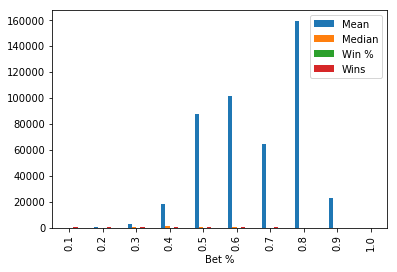

In [317]:
df.plot(x='Bet %',kind='bar')

In [342]:
import plotly.graph_objs as go

fig = go.Figure(data=[
    go.Bar(name='Median', x=df['Bet %'], y=df['Median']),
    go.Bar(name='Win %', x=df['Bet %'], y=df['Win %'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

ModuleNotFoundError: No module named 'plotly.graph_objects'

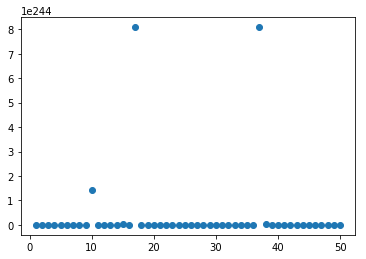

In [223]:
plt.scatter(y=out[-1],x=[i for i in range(1,len(out[-1])+1)])

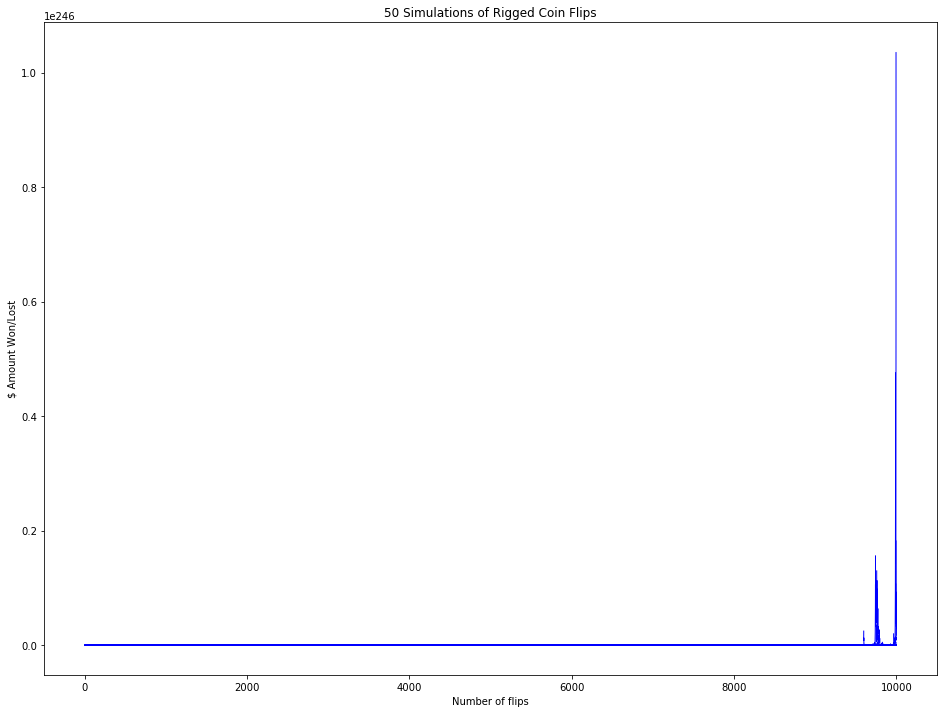

In [224]:
plt.figure(figsize=(16,12))
plt.plot(out, 'b', lw=0.5) #Plots all 50 series.
#plt.plot(c_1.mean(axis=1), 'r', lw=2.5); #Plots the average over all 50 series.
plt.title('50 Simulations of Rigged Coin Flips');
plt.xlabel('Number of flips');
plt.ylabel('$ Amount Won/Lost');

In [96]:
G = GamblersRuin(20,8000,0.6,0.7)

In [97]:
G.simulate(10000)

num wins:  6228 num losses:  3772


[[20,
  32.0,
  51.2,
  81.92,
  32.77,
  52.43,
  83.89,
  134.22,
  53.69,
  85.9,
  137.44,
  54.98,
  87.97,
  140.75,
  56.3,
  90.08,
  144.13,
  230.61,
  368.98,
  147.59,
  59.04,
  94.46,
  151.14,
  60.46,
  24.18,
  38.69,
  61.9,
  99.04,
  39.62,
  63.39,
  101.42,
  162.27,
  64.91,
  103.86,
  166.18,
  265.89,
  106.36,
  42.54,
  68.06,
  27.22,
  10.89,
  4.36,
  6.98,
  2.79,
  4.46,
  7.14,
  11.42,
  18.27,
  29.23,
  11.69,
  4.68,
  7.49,
  11.98,
  19.17,
  30.67,
  12.27,
  19.63,
  7.85,
  12.56,
  20.1,
  32.16,
  51.46,
  82.34,
  131.74,
  52.7,
  84.32,
  134.91,
  53.96,
  86.34,
  138.14,
  221.02,
  353.63,
  565.81,
  905.3,
  1448.48,
  2317.57,
  927.03,
  370.81,
  148.32,
  237.31,
  379.7,
  607.52,
  972.03,
  1555.25,
  2488.4,
  3981.44,
  6370.3,
  2548.12,
  4076.99,
  1630.8,
  652.32,
  1043.71,
  1669.94,
  2671.9,
  1068.76,
  427.5,
  684.0,
  1094.4,
  1751.04,
  2801.66,
  4482.66,
  1793.06,
  2868.9,
  4590.24,
  7344.38,
  11751.01

In [32]:
import scipy 
 
p = 0.5 
n = 300 
k = 200 
victory = 10; 
ruin = 0; 
interval = victory - ruin + 1 
 
winLose = 2*( scipy.random.random((n,k,interval)) <= p ) - 1 
totals = scipy.cumsum(winLose, axis = 0) 
 
start = scipy.multiply.outer( scipy.ones((n+1,k), dtype=int), scipy.arange(ruin, victory+1, dtype=int)) 
paths = scipy.zeros((n+1,k,interval), dtype=int) 
paths[ 1:n+1, :,:] = totals 
paths = paths + start 
 
def match(a,b,nomatch=None): 
    return  b.index(a) if a in b else nomatch 
# arguments: a is a scalar, b is a python list, value of nomatch is scalar 
# returns the position of first match of its first argument in its second argument 
# but if a is not there, returns the value nomatch 
# modeled on the R function "match", but with less generality 
 
hitVictory = scipy.apply_along_axis(lambda x:( match(victory,x.tolist(),nomatch=n+2)), 0, paths) 
hitRuin = scipy.apply_along_axis(lambda x:match(ruin,x.tolist(),nomatch=n+2), 0, paths) 
# If no ruin or victory on a walk, nomatch=n+2 sets the hitting 
# time to be two more than the number of steps, one more than 
# the column length. 
durationUntilRuinOrVictory = scipy.minimum(hitVictory, hitRuin) 
 
import numpy.ma 
durationMasked = scipy.ma.masked_greater(durationUntilRuinOrVictory, n) 
 
meanDuration = scipy.mean(durationUntilRuinOrVictory, axis = 0) 
durationFunction = scipy.polyfit( scipy.arange(ruin, victory+1, dtype=int), meanDuration, 2) 
print ("Duration function is: ", durationFunction[2], "+", durationFunction[1], "x+", durationFunction[0], "x^2") 
# should return coefficients to (x-ruin)*(victory - x), descending degree order

Duration function is:  0.5951048951048667 + 9.673081585081603 x+ -0.9730536130536144 x^2


In [28]:
winLose[0]

array([[-1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1],
       [-1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1],
       [ 1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1],
       [-1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1],
       [-1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1],
       [-1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1],
       [ 1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1],
       [ 1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1],
       [-1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1],
       [ 1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1]])

In [29]:
winLose[1]

array([[ 1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1],
       [ 1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1],
       [ 1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1],
       [-1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1],
       [-1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1],
       [-1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1],
       [-1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1],
       [-1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1]])

In [31]:
totals[1]

array([[ 0,  0,  2,  0, -2, -2,  2,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  2, -2,  0,  0,  2,  2],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-2,  0, -2,  0,  0, -2,  0,  2,  2, -2, -2],
       [-2,  2,  2,  0,  0,  0, -2,  2,  0,  0, -2],
       [-2,  0,  0, -2,  0,  0, -2,  0, -2, -2,  0],
       [ 2, -2, -2,  2,  2, -2,  0,  2,  0,  0,  0],
       [ 0,  2,  0,  2,  2, -2, -2, -2, -2,  2,  0],
       [-2,  0,  0,  0,  2,  2,  0, -2, -2,  0,  0],
       [ 0,  0,  0,  2, -2, -2,  0,  2,  0,  0,  2]])

In [45]:
hitVictory

array([[250,  71, 126, ...,   4,   3,   0],
       [ 18, 302,  26, ...,   6,  19,   0],
       [116, 302,  28, ...,   4,   5,   0],
       ...,
       [ 50, 183, 302, ...,   2,   1,   0],
       [302, 302, 258, ..., 102,   1,   0],
       [ 30, 302, 302, ...,   4,  35,   0]])

In [424]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [425]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css'] 
app = dash.Dash(__name__, external_stylesheets=external_stylesheets) 
server = app.server

In [430]:
colors = {
	'background': 'white',
	'header': 'black',
	'text1': 'black',
	'text2': '#3C85CC'
}
markdown_text1 = '''
Welcome! This web app is intended to illustrate the problem of the "gambler's ruin". Consider the following scenario: \n
You walk into a casino with an initial amount of $i, and you hope to increase your fortune to $N. You pick a gambling game where \n
your probability of success is p per round, and we assume that each round is independent and identically distributed (iid). \n
If you are successful that round, then one unit is added to your balance. If you lose that round, then one unit is removed \n
from your balance. The game ends when either your balance is $0 or reaches $N. What is your probability of winning/ reaching your goal of $N?
Play around with the numbers below to see how your probability of winning changes. \n
Conditions: N must be larger than i, and it is recommended to keep the number of games under 100 for faster results.
'''


markdown_text2 = '''
The section below shows your probability of winning as calculated by a formula, as well as your observed percentage of wins \n 
based on the number of games entered with margin of error for a 95% confidence interval. 
The graph shows the outcome of each game and the balance at every round.
'''
app.layout = html.Div([
		html.H1(children="Gambler's Ruin Demo", style={'color': colors['header'], 'padding': 30}),
		html.Div([dcc.Markdown(children=markdown_text1)], style={'padding-left': 50, 'display': 'display-inblock'}),
		html.Br(),
		html.Div(['Probability of Sucess for each round (p): ', 
				  dcc.Input(id='p_input', min=0, max=1, value='0.5', type='number')],
				  style={'padding': 5, 'padding-left':'100px', 'display': 'display-inblock', 'color': colors['text1']}),
		html.Div(['Initial Amount (i): ',
				  dcc.Input(id='i_input', value='10', type='number')],
				  style={'padding': 5, 'padding-left':'100px', 'display': 'display-inblock', 'color': colors['text1']}),
		html.Div(['Goal Amount (N): ', 
				  dcc.Input(id='N_input', value='20', type='number')],
				  style={'padding': 5, 'padding-left':'100px', 'color': colors['text1']}),
		html.Div(['Number of games: ',
			 	  dcc.Input(id='games_input', value='30', type='number')],
			 	  style={'padding': 5, 'padding-left':'100px', 'color': colors['text1'], 'backgroundColor': colors['background']}),
		html.Div([dcc.Loading(id='loading-1', type='circle', children=[html.Div(id="loading")]), 
				  html.Button(id='submit-button-state', n_clicks=0, children='Play')],
				  style={'padding':5, 'padding-left':'100px', 'margin':20, 'color': colors['text1']}),
		html.Div([dcc.Markdown(children=markdown_text2)], style={'padding-left': 50, 'display': 'display-inblock'}),
		html.Table([
			html.Tr([html.Td('Probability of winning (analytical solution): '), html.Td(id='prob')]),
			html.Tr([html.Td('Observed Percentage of Wins: '), html.Td(id='obs_wins')])],
			style={'padding': 5, 'margin-left': '100px', 'display': 'display-inblock', 'color': colors['text2']}),
		html.Div([dcc.Graph(id='gamble-graph')], style={'padding-left':'50px', 'backgroundColor': colors['background']})
])
if __name__ == '__main__':
    app.run_server(debug=True)